In [1]:
import pandas as pd
import numpy as np
import scanpy as sc

/home/debnatho/anaconda3/envs/trajectory_analysis_R/lib/python3.6/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
#Read normalized single-nuc data from Seurat:
adata= sc.read_h5ad("Placenta_normalized_Seurat_markers.h5ad")

adata

AnnData object with n_obs × n_vars = 101031 × 26115 
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'integrated_snn_res.0.5', 'seurat_clusters', 'group', 'disease', 'time', 'tissue', 'tissue_time', 'integrated_snn_res.1', 'integrated_snn_res.2', 'integrated_snn_res.3', 'cell_type', 'RNA_snn_res.0.8', 'Merged_cell_type_PC35', 'cell_type_merged', 'sub_cluster', 'sub_cluster_final', 'cell_type_semifinal', 'cell_type_semifinal_v2'
    uns: 'cell_type_semifinal_colors', 'umap_density_disease_params', 'umap_density_group_params', 'umap_density_params', 'umap_density_tissue_params'
    obsm: 'X_umap'

In [3]:
#Perform  Principal Component Analysis (PCA) on normalized data non-batch corrected. 

sc.tl.pca(adata)

In [4]:
#Set the cell type annotation key (annot_key) to 'cell_type_semifinal_v2' (final annotation)
annot_key= 'cell_type_semifinal_v2'

for group in adata.obs[annot_key].cat.categories:
    print(group)
    adata_sub=adata.copy()
    ix= np.in1d(adata.obs[annot_key],group)
    adata_sub=adata.copy()[ix]
    adata.uns['mean_pca_'+group]=np.squeeze(np.asarray(adata_sub.obsm['X_pca'].mean(axis=0).T))
    del adata_sub

DSC_1
DSC_2
Unclassified_35
dDC
dEVT
dEpC
dFB_1
dFB_2
dGranulocyte
dLEC
dLEC_dysfunctional
dMAC_activated
dMAC_classical
dMSC
dMonocyte
dNK_1
dNK_2
dNK_prol
dPlasmaCell
dSCT
dSMC
dTcell
dVEC
vBcell
vDC
vEB
vEVT
vFB
vHBC
vMC
vSCT_1
vSCT_2
vTSC
vTcell
vVCT
vVCT_prol
vVEC
vtropho_15


In [5]:
#Compute for all lineage: trophoblast, mesoendothelial & immune cell types. 
#Exclude 'Unclassified_35': very surely, they are doublets & are excluded from all analysis 
d = {'DSC1':adata.uns['mean_pca_DSC_1'],
     'DSC2':adata.uns['mean_pca_DSC_2'],
     'dMSC':adata.uns['mean_pca_dMSC'],
     'dSMC':adata.uns['mean_pca_dSMC'],
     'dFB1':adata.uns['mean_pca_dFB_1'],
     'dFB2':adata.uns['mean_pca_dFB_2'],
     'vFB':adata.uns['mean_pca_vFB'],
     'vMC': adata.uns['mean_pca_vMC'], 
     'dLEC': adata.uns['mean_pca_dLEC'],
     'dLECP': adata.uns['mean_pca_dLEC_dysfunctional'],
     'dVEC': adata.uns['mean_pca_dVEC'],
     'vVEC': adata.uns['mean_pca_vVEC'],
     'vTSC':adata.uns['mean_pca_vTSC'],
     'vVCT':adata.uns['mean_pca_vVCT'],
     'vVCTp':adata.uns['mean_pca_vVCT_prol'],
     'dEVT':adata.uns['mean_pca_dEVT'],
     'dSCT':adata.uns['mean_pca_dSCT'],
     'vSCT_1':adata.uns['mean_pca_vSCT_1'],
     'vSCT_2':adata.uns['mean_pca_vSCT_2'],
     'vSCTjuv':adata.uns['mean_pca_vtropho_15'],
     'vEVT': adata.uns['mean_pca_vEVT'], 
     'dDC':adata.uns['mean_pca_dDC'],
     'dMonocyte':adata.uns['mean_pca_dMonocyte'],
     'vEB':adata.uns['mean_pca_vEB'],
     'vPAMM':adata.uns['mean_pca_vDC'],
     'dMAC1':adata.uns['mean_pca_dMAC_activated'],
     'dMAC2':adata.uns['mean_pca_dMAC_classical'],
     'dNK1':adata.uns['mean_pca_dNK_1'],
     'dNK2':adata.uns['mean_pca_dNK_2'],
     'dNKp': adata.uns['mean_pca_dNK_prol'], 
    'vHBC':adata.uns['mean_pca_vHBC'],
     'dTcell':adata.uns['mean_pca_dTcell'],
     'vTcell': adata.uns['mean_pca_vTcell'], 
    'vBcell': adata.uns['mean_pca_vBcell'],
     'dGranul': adata.uns['mean_pca_dGranulocyte'],
     'dPC': adata.uns['mean_pca_dPlasmaCell']
     
      }

df = pd.DataFrame(data=d)

In [6]:
#sort data frame: 

names_sort_group=['DSC1','DSC2', 'dMSC',  'dFB1', 'dFB2',  'dSMC','vFB','vMC',
                  'dVEC', 'vVEC', 'dLEC', 'dLECP', 
                 'vTSC','vVCT', 'vVCTp', 'vEVT', 'vSCT_1', 'vSCT_2',  'vSCTjuv',
                  'dSCT', 'dEVT', 'dDC', 'vPAMM', 'dMonocyte', 
                  'dNK1', 'dNK2', 'dNKp', 
                  'dMAC2','dMAC1',
                  'vHBC','dTcell', 'vTcell','vBcell', 'vEB', 
                  'dGranul', 'dPC']


df_sort=df[names_sort_group]

In [7]:
df_sort.head()

,DSC1,DSC2,dMSC,dFB1,dFB2,dSMC,vFB,vMC,dVEC,vVEC,...,dNKp,dMAC2,dMAC1,vHBC,dTcell,vTcell,vBcell,vEB,dGranul,dPC
0,-12.117527,-13.872804,-12.939124,-14.737915,-12.626058,-12.074629,-7.679892,-7.482395,-13.100078,-7.201752,...,-16.629276,-16.240704,-14.287495,-11.933323,-15.077716,-11.682895,-11.116971,-10.036400,-13.075035,-12.458323
1,4.462419,-3.678433,3.226981,5.027826,0.510523,-3.243145,5.221335,3.122454,-1.324861,2.662608,...,-3.814340,-1.933363,-6.454879,0.633510,-8.516292,-5.014199,-3.626131,-3.854228,-7.205309,-5.762839
2,3.768325,4.154243,3.455485,1.509405,1.754446,2.291921,0.076220,0.115007,2.589350,0.013048,...,-2.397837,-8.261333,-4.537400,-9.973800,-0.854433,-3.326886,-2.744817,-0.182078,-0.000749,0.439880
3,0.249430,-6.526236,-0.837673,-1.330086,-2.262236,-2.407153,-1.898027,-2.794346,-1.306413,-0.213827,...,-6.875762,12.993423,5.967599,15.334616,-6.239708,-4.724988,-0.732973,-5.925963,-2.189049,-2.552213
4,-6.200469,-9.477628,-6.648427,-8.861000,-8.111035,-7.532873,-8.182920,-8.431234,-7.573228,-7.286132,...,10.096354,-0.985307,-3.936810,-0.305186,3.037497,7.731547,2.636600,-5.587856,-0.855392,-0.737006


In [8]:
#Calculate Pearson correlation between cell-type pairs from log-normalized data
#Return Pearson product-moment correlation coefficients. 
df_cor_pearson=np.corrcoef(df_sort.T)
names=df_sort.columns
df_cor_named_pearson=pd.DataFrame(df_cor_pearson,index=names,columns=names) 

#Save the df for future use: df_cor_named_pearson.to_csv('Celltype_pearson_correlation.csv')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(40,40)

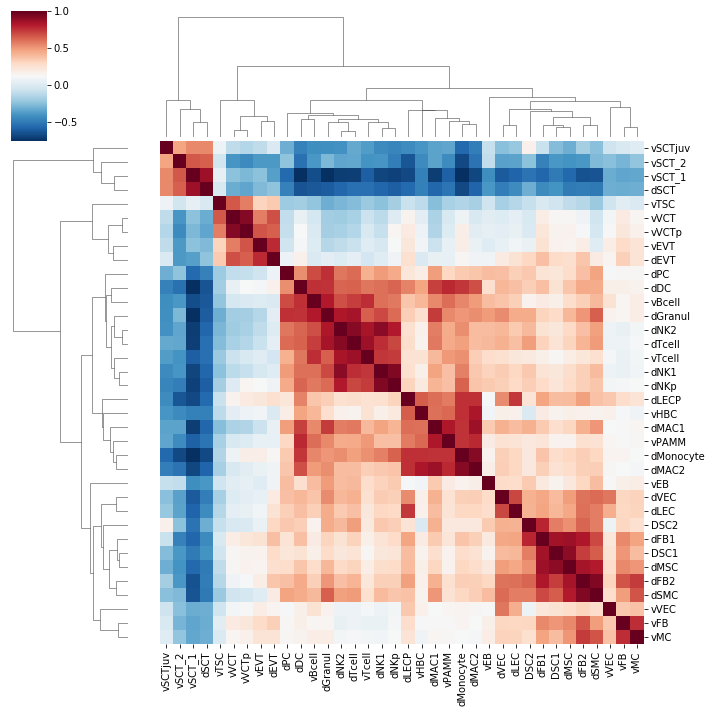

In [10]:
#Plot a matrix dataset as a hierarchically-clustered heatmap  & metric='euclidean' 
ax=sns.clustermap(df_cor_named_pearson,cmap='RdBu_r',method='average')

plt.rcParams["figure.figsize"] = [40,40]
plt.savefig('./Celltype_PearsonCorr_manuscript_v1.pdf', dpi=400, orientation='landscape', bbox_inches='tight',
           vmin=-1, vmax=1, center= 0)

plt.show()